<a href="https://colab.research.google.com/github/Lucaszl/Campeonato-Brasileiro/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Criando o Pipeline

# Vai dividir os dados por tipo de coluna (numérica ou categórica)
from sklearn.compose import ColumnTransformer

# Vai encontrar valores nulos e preencher automaticamente
from sklearn.impute import SimpleImputer

# Standard - Como se fosse um engenheiro de padronização - Coloca tudo na mesma escala
# One -
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.pipeline import Pipeline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,7)

df = sns.load_dataset('titanic')


print(f'Nossa lista de passageiros contém {df.shape[0]} registro e {df.shape[1]} Informações sobre cada um.')

df.head()

Nossa lista de passageiros contém 891 registro e 15 Informações sobre cada um.


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
fig = px.pie(
    df,
    names='survived',
    title='Distribuição de sobrevivente do Titanic',
    labels={
        0: 'não sobreviveu',
        1: 'sobreviveu',
    },
    color_discrete_sequence=px.colors.sequential.Agsunset
  )
fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()

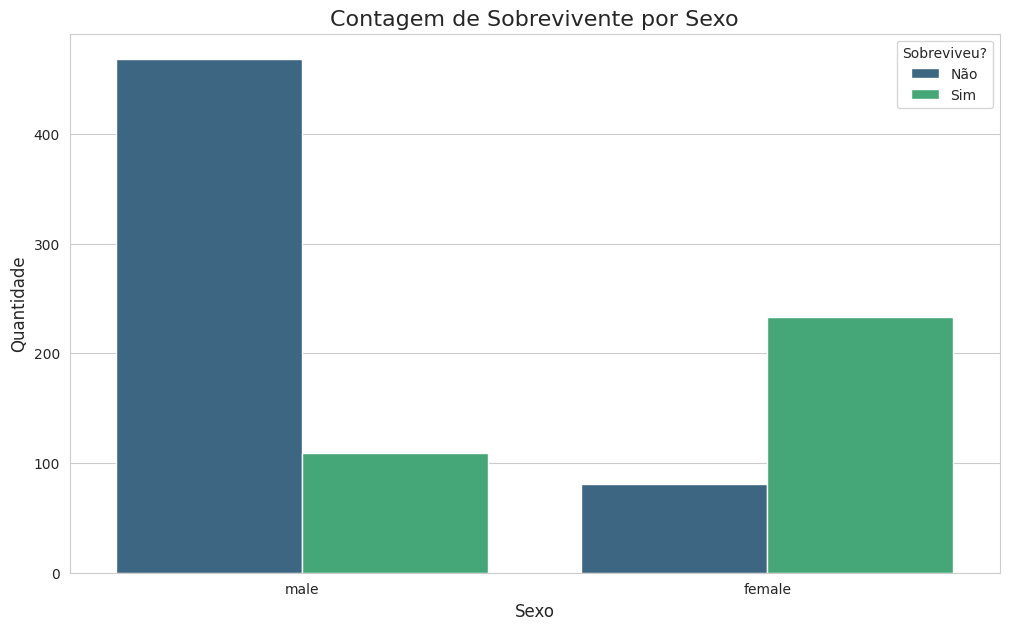

In [12]:
sns.countplot(
    x='sex',
    hue='survived',
    data=df,
    palette='viridis'
    )
plt.title('Contagem de Sobrevivente por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.legend(title='Sobreviveu?', labels=['Não', 'Sim']) # Changed 'label' to 'labels'
plt.show()

Text(0, 0.5, 'Quantidade')

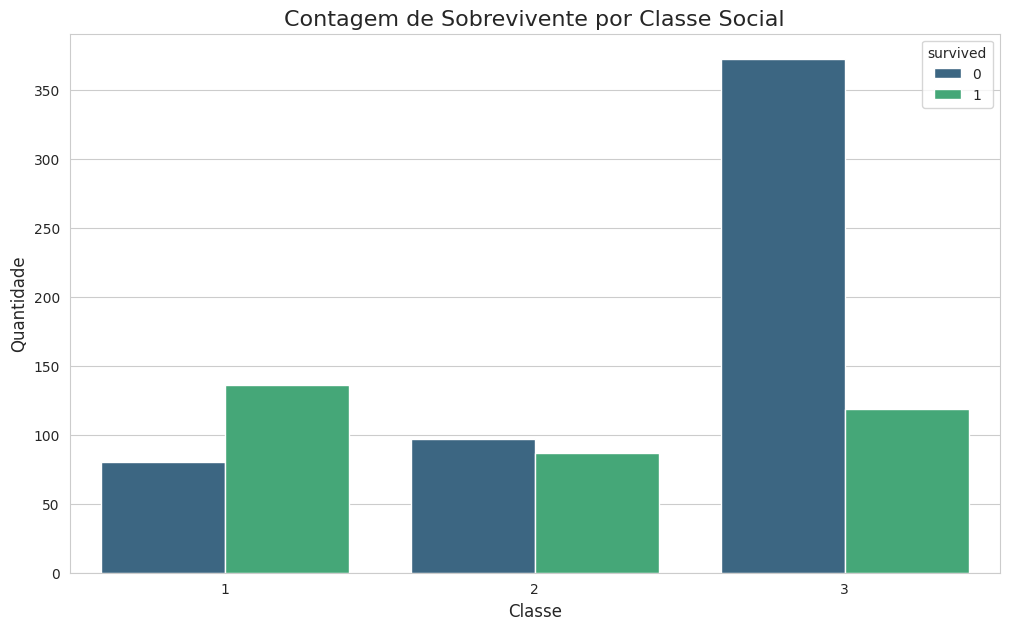

In [15]:
sns.countplot(
    x='pclass',
    hue='survived',
    data=df,
    palette='viridis'
)
plt.title('Contagem de Sobrevivente por Classe Social', fontsize=16)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

In [20]:
# Recarregar os Dados
df_original = sns.load_dataset('titanic')
df = df_original.copy()

# Engenharia de Atributos
df['family_size'] = df['sibsp'] + df['parch'] + 1

df['is_alone'] = (df['family_size'] == 1 ).astype(int)

# Removendo Ruidos                                                                 seleciona a coluna, ele apaga da própria dataset
df.drop(['alive', 'who', 'adult_male', 'class', 'alone', 'sibsp', 'parch', 'deck'], axis=1, inplace=True)

print('Preparação Mínima Concluida. Dados prontos para o Pipeline')

df.head()



Preparação Mínima Concluida. Dados prontos para o Pipeline


,survived,pclass,sex,age,fare,embarked,embark_town,family_size,is_alone
0,0,3,male,22.0,7.2500,S,Southampton,2,0
1,1,1,female,38.0,71.2833,C,Cherbourg,2,0
2,1,3,female,26.0,7.9250,S,Southampton,1,1
3,1,1,female,35.0,53.1000,S,Southampton,2,0
4,0,3,male,35.0,8.0500,S,Southampton,1,1


In [23]:


# Separar as Pistas (X) dos Resultados (Y)


X = df.drop('survived', axis=1)
y = df['survived']

# Separando os Dados em Números e Categóricos
numeric_features = ['age', 'fare', 'pclass', 'family_size', 'is_alone']

categorical_features = ['sex', 'embark_town']

# Criando a Esteira dos Dados numérico
numeric_transformer = Pipeline(steps=[
     # Preenche valores ausentes com a mediana
    ('imputer', SimpleImputer(strategy='median')),
    # Normalização
    ('scaler', StandardScaler())
])
